## Final Project Submission

Please fill out:
* Student name:
1. Winfred Kinya Bundi.
2. Carol Mundia.
3. Paul Muniu.
4. Dennis Mwenda.
* Student pace: Full time Hybrid
* Scheduled project review date/time:2/05/2024 
* Instructor name: Mwikali Maryanne.
* Blog post URL:git@github.com:winnycodegurl/dsc-phase-2-projectgroup4.git


## INTRODUCTION

In the fast-paced world of real estate, it's crucial for agencies to provide clients with precise information. Clients, whether they're looking to become homeowners or investors, rely on real estate companies for guidance on important decisions such as pricing, market trends, and property evaluations. To meet this need, real estate agencies can benefit from a sophisticated regression-based tool. This tool uses various property variables like the number of bedrooms, year built, floor count, living area, condition, location, and amenities to accurately predict property prices. By employing regression analysis, agencies can offer clients more precise pricing estimates, leading to better-informed decisions. Ultimately, this tool aims to improve client satisfaction, streamline decision-making processes, and drive success for real estate agencies.


## BUSINESS UNDERSTANDING



The provided dataset encompasses details on homes sold, encompassing their attributes and sale prices. This dataset holds significant potential for real estate agencies across various avenues:



1. 
Market Analysis:

 Leveraging the dataset, agencies can discern market trends, including the demand for different property types, burgeoning neighborhoods witnessing property value escalations, and the impact obetter f featurenws or property renovations on sale prices. By employing market segmentation techniques, such as demographic or psychographic segmentation, agencies can further refine their analysis to understand the preferences and behaviors of distinct customer segments within the real estate market




2. 
Property Valuation: 

By comprehending the correlation between house features and sale prices, agencies can proficiently gauge property values for both sellers and buyers, ensuring equitable and competitive pricing strategies




3. 
Targeted Marketing: 

Through discerning buyer preferences from the dataset, agencies can tailor marketing endeavors to resonate with potential buyers seeking specific property types or neighborhoods, thus enhancing the efficacy of their outreach efforts. Market segmentation insights can inform the development of targeted marketing campaigns tailored to the unique needs and preferences of different customer segments, thereby maximizing the impact of marketing investments.






## PROBLEM STATEMENT.



In King County, people involved in real estate have trouble figuring out what affects property values and trends in the market.
This study wants to help by looking at things like what features a property has, where it's located, what buyers prefer,
and how things change over time. By understanding these things better, people in real estate can make smarter choices about
buying and selling property and how they position themselves in the market.
The main goal is to give them practical advice that helps them do well in King County's real estate market, 
which is always changing.










## OBJECTIVES.

Main OBJECTIVE


The primary aim of this project is to develop a predictive regression model to support real estate agencies in advising clients 
on house prices. This model is intended to anticipate potential changes in property value based on property characteristics, 
furnishing clients with valuable insights to facilitate informed investment decisions.



Specific Goals:


i). Identification of Key Influencing Factors on House Prices:



Analyze various property features, including bedrooms, bathrooms, and square footage, to determine their impact on sale price.



ii). Assessment of Model Performance:


Employ metrics such as mean squared error, R-squared values, and residual analysis to 
evaluate the model's accuracy in predicting house prices effectively.

    

iii). Provision of Actionable Recommendations:



Offer practical recommendations to real estate agencies aimed at enhancing profitability and market presence. 
Utilize insights gleaned from the model to optimize marketing strategies and enhance overall decision-making processes.








# Data Understanding.


King County, Washington, situated in the northwest of the United States, is known for its vibrant housing market centered around Seattle. The county has experienced significant growth due to its strong economy and cultural importance, attracting a large number of residents and creating high demand for housing in both urban and suburban areas. Seattle, with its impressive skyline, is especially sought after by tech professionals and city lovers. King County's real estate market is competitive, offering a range of neighborhoods to suit different preferences, from historic areas to modern suburban developments.

### Whereby the dataset contains:

### Target Variable

price: Sale price of the house .

### Unique identifier

id - Unique identifier for a house

### Property Characteristics:

bedrooms: Number of bedrooms.

bathrooms: Number of bathrooms.

sqft_living: Square footage of living space in the home.

sqft_lot: Square footage of the lot.

floors: Number of floors (levels) in the house.

waterfront: Indicates whether the house is on a waterfront (categorical: YES/NO).

view: Quality of view from the house, categorized into various types.

condition: Overall condition of the house, categorized based on maintenance.

grade: Overall grade of the house, reflecting construction and design quality.

### Additional Features:

sqft_above: Square footage of house apart from the basement.

sqft_basement: Square footage of the basement.

yr_built: Year when the house was built.

yr_renovated: Year when the house was renovated.

zipcode: ZIP Code of the property.

lat: Latitude coordinate of the property.

long: Longitude coordinate of the property.

sqft_living15: Square footage of interior housing living space for the nearest 15 neighbors.

sqft_lot15: Square footage of the land lots of the nearest 15 neighbors.

### TABLE OF CONTENTS
1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Statistical Analysis

5.Modelling

6.Regression Results

7.Conclusion

8.Reccomendations

# 1. DATA PREPARATION

In [69]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.

from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF).
from statsmodels.graphics.regressionplots import plot_partregress_grid  # For partial regression plots.
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets.
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features.
from sklearn.linear_model import LinearRegression  # Linear Regression model.
from sklearn.preprocessing import StandardScaler  # Standardizing/Scaling features.
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for model performance.
import statsmodels.api as sm
from scipy.stats import kstest

# Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import f_oneway  # One-way ANOVA statistical test.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.

#### *loading the King County House Sales dataset*


In [71]:
# Load the dataset to inspect the initial state of the data
file_path = 'data/kc_house_data.csv'
housing_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
housing_data.info()
housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### *loading the column.md dataset*


In [72]:
column_names_file = "data/column_names.md"

with open(column_names_file, "r") as file:
    markdown_content = file.readlines()

column_names = []
description = []
for line in markdown_content:
    parts = line.split('-', 1)
    if len(parts) == 2:  # Check if split produces two parts
        column_names.append(parts[0].strip())
        description.append(parts[1].strip())

# Create DataFrame
data = {
    "Column_name": column_names,
    "Description": description
}
column_name_df = pd.DataFrame(data)

column_name_df


,Column_name,Description
0,* `id`,Unique identifier for a house
1,* `date`,Date house was sold
2,* `price`,Sale price (prediction target)
3,* `bedrooms`,Number of bedrooms
4,* `bathrooms`,Number of bathrooms
5,* `sqft_living`,Square footage of living space in the home
6,* `sqft_lot`,Square footage of the lot
7,* `floors`,Number of floors (levels) in house
8,* `waterfront`,Whether the house is on a waterfront
9,* `view`,Quality of view from house


In [73]:
# Creating function to check counts of missing values
def has_missing_values(df):
    missing_values = df.isnull().sum()
    num_missing_values = missing_values[missing_values > 0].count()
    if num_missing_values == 0:
        print("There are no missing values in the DataFrame.")
    else:
        print(f"There are {num_missing_values} columns with missing values.")
        print(missing_values[missing_values > 0])
        
has_missing_values(housing_data)

There are 3 columns with missing values.
waterfront      2376
view              63
yr_renovated    3842
dtype: int64


In [74]:
#creating a function to check for duplicates.
def has_duplicates(df):
    num_duplicates = df.duplicated().sum()
    if num_duplicates == 0:
        print("There are no duplicate rows in the DataFrame.")
    else:
        print(f"There are {num_duplicates} duplicate rows in the DataFrame.")

has_duplicates(housing_data)

There are no duplicate rows in the DataFrame.


The dataset contains 21,597 entries and 21 features. Here’s a brief overview of the data:

### Columns and their Data Types:
#### Numerical:
id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

#### Categorical:
date (format object, should be datetime), waterfront, view, condition, grade, sqft_basement (format object, should be numeric)

#### Missing Values:
waterfront: 2,376 missing values
view: 63 missing values
yr_renovated: 3,842 missing values


## 2. DATA CLEANING

### a)Dropping columns:
We're dropping some columns during data cleaning to streamline our analysis and focus on the most relevant features. By removing unnecessary or redundant columns, we aim to simplify the dataset and improve the efficiency of subsequent analytical processes. This helps in reducing noise and enhancing the clarity of our findings.

In [75]:
housing_data = housing_data.drop(['long','lat','view', 'zipcode'], axis=1)
housing_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
20146,7967000130,4/1/2015,370228.0,4,3.00,2050,4000,2.0,NO,Average,8 Good,2050,0.0,2014,0.0,2050,4000
13983,7338000150,1/29/2015,160000.0,2,1.00,1070,4200,1.0,NO,Good,6 Low Average,1070,0.0,1983,0.0,1150,4200
3605,8658303585,8/7/2014,252500.0,2,1.00,900,7500,1.0,NO,Good,6 Low Average,900,0.0,1961,0.0,1190,10000
9229,1787250210,12/22/2014,379000.0,4,2.75,2410,5225,2.0,NO,Average,8 Good,2410,0.0,2001,0.0,2300,5378
11243,1843200350,7/22/2014,150000.0,2,1.50,1360,1934,2.0,NO,Good,7 Average,1360,0.0,1978,0.0,1360,1898


### b)Checking for placeholders

Placeholders are values used to denote missing, unknown, or invalid data within a dataset. Common examples include "N/A", "-", "UNKNOWN", "NULL", #, etc. It's important to identify and handle placeholders properly during data preprocessing to ensure accurate analysis and modeling

In [76]:
# Define a list of common placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty", "#", "#####"]

# Check for potential placeholders in the DataFrame
found_placeholder = False
for column in housing_data.columns:
    placeholder_count = housing_data[column].isin(common_placeholders).sum()
    if placeholder_count > 0:
        print(f"Column '{column}': Found {placeholder_count} occurrences of potential placeholder .")
        found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")


Column 'sqft_basement': Found 454 occurrences of potential placeholder .


In [77]:

# Convert the common placeholders to lowercase for case-insensitive matching
common_placeholders_lower = [placeholder.lower() for placeholder in common_placeholders]

# Replace any of the common placeholders with NaN
housing_data['sqft_basement'] = housing_data['sqft_basement'].replace(common_placeholders_lower, pd.NA)

# Drop rows with NaN in the sqft_basement column
housing_data.dropna(subset=['sqft_basement'], inplace=True)


Counter-check

In [11]:
# confirm no more placeholders
# Define a list of common placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty", "#", "#####"]

# Check for potential placeholders in the DataFrame
found_placeholder = False
for column in housing_data.columns:
    placeholder_count = housing_data[column].isin(common_placeholders).sum()
    if placeholder_count > 0:
        print(f"Column '{column}': Found {placeholder_count} occurrences of potential placeholder .")
        found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")


No potential placeholders found in the DataFrame.




### b) Handling Missing Values:
waterfront: 
Since these are categorical, we can replace missing values with the mode or create a separate category for missing values.
<br> yr_renovated: 
A significant number of missing values suggest that these houses might not have been renovated. Impute with 0 or a specific marker value.

In [78]:
# For categorical data, impute missing values with mode or specific marker
waterfront_mode = housing_data['waterfront'].mode()[0]

housing_data['waterfront'].fillna(waterfront_mode, inplace=True)
housing_data['yr_renovated'].fillna(0, inplace=True)  # Assuming no renovation if NaN

### c) Convert Data
Convert date from object to datetime format.
sqft_basement: Convert from object to numeric, handling any non-numeric entries.

In [79]:
from datetime import datetime

housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['sqft_basement'] = pd.to_numeric(housing_data['sqft_basement'], errors='coerce')  # Convert to numeric, coerce errors
housing_data['sqft_basement'].fillna(0, inplace=True)  # Assuming no basement if NaN or non-numeric

In [80]:
# Change waterfront to integer
housing_data['waterfront'] = housing_data['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

In [81]:
# checking "grade" column
unique_grade = housing_data.grade.unique()
print(unique_grade)

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [82]:
# checking "condition"column
unique_condition = housing_data.condition.unique()
print(unique_condition)

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [83]:
# Convert grade and condition into representative numbers for easier Exploratory analysis.
housing_data['condition'] = housing_data['condition'].map({'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}).astype(float)
housing_data['grade'] = housing_data['grade'].map({'3 Poor': 1,'4 Low': 2,'5 Fair': 3,'6 Low Average': 4,'7 Average': 5,'8 Good': 6,'9 Better': 7,'10 Very Good': 8,'11 Excellent': 9,'12 Luxury': 10,'13 Mansion': 11}).astype(float) 

In [84]:

# Check transformations
housing_data.info()
housing_data.sample(5)


<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21143 non-null  int64         
 1   date           21143 non-null  datetime64[ns]
 2   price          21143 non-null  float64       
 3   bedrooms       21143 non-null  int64         
 4   bathrooms      21143 non-null  float64       
 5   sqft_living    21143 non-null  int64         
 6   sqft_lot       21143 non-null  int64         
 7   floors         21143 non-null  float64       
 8   waterfront     21143 non-null  int64         
 9   condition      21143 non-null  float64       
 10  grade          21143 non-null  float64       
 11  sqft_above     21143 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21143 non-null  int64         
 14  yr_renovated   21143 non-null  float64       
 15  sqft_living15  21143 non

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
4511,723049333,2015-04-05,285000.0,3,1.50,1490,10367,1.0,0,3.0,5.0,1010,480.0,1957,0.0,1000,8254
1181,7625700935,2014-06-05,875000.0,3,3.50,3250,6000,2.0,0,3.0,8.0,2500,750.0,2001,0.0,1650,6000
1875,1853081000,2014-07-17,820000.0,5,2.75,2830,6137,2.0,0,3.0,7.0,2830,0.0,2010,0.0,3170,6285
12273,7016200030,2015-03-20,480000.0,4,2.50,2080,7966,1.0,0,3.0,5.0,1200,880.0,1970,0.0,1920,7500
8546,7981900110,2014-10-03,350000.0,4,2.75,2300,3175,1.5,0,3.0,4.0,1340,960.0,1966,0.0,1260,3175


### Feature Engineering:

Create additional features that might be informative for our modeling:

**House Age**: Calculate the age of the house from the 'yr_built' column to the current year.

**Renovation Age**: If a house has been renovated ('yr_renovated' > 0), calculate the years since the renovation.

**Total Square Footage**: Sum up 'sqft_living', 'sqft_lot', 'sqft_above', and 'sqft_basement' for a total square footage feature.

These new features could reveal deeper insights into the housing prices and help improve the performance of our statistical models.


In [85]:
# Current year for age calculations
from datetime import datetime

current_year = datetime.now().year

# Feature Engineering
housing_data['house_age'] = current_year - housing_data['yr_built']
housing_data['renovation_age'] = housing_data.apply(
    lambda x: 0 if x['yr_renovated'] == 0 else current_year - x['yr_renovated'], axis=1
)
housing_data['total_sqft'] = housing_data['sqft_living'] + housing_data['sqft_lot'] + \
                                     housing_data['sqft_above'] + housing_data['sqft_basement']

# Display the new features
housing_data[['house_age', 'renovation_age', 'total_sqft']].head()


,house_age,renovation_age,total_sqft
0,69,0.0,8010.0
1,73,33.0,12382.0
2,91,0.0,11540.0
3,59,0.0,8920.0
4,37,0.0,11440.0


The new features have been successfully added:

**House Age**: Represents the age of the house since it was built.

**Renovation Age**: If renovated, this indicates the number of years since the last renovation; otherwise, it is 0.

**Total Square Footage**: Sum of the living area, lot size, above-ground level area, and basement area


##### *Sample data check.*

In [20]:
housing_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age,renovation_age,total_sqft
8540,3034200366,2014-12-03,409000.0,3,1.75,1440,9065,1.0,0,4.0,6.0,1440,0.0,1972,0.0,1990,8812,52,0.0,11945.0
19433,2023059052,2015-05-04,450000.0,3,1.00,1350,92721,1.0,0,2.0,4.0,1200,150.0,1946,0.0,1860,8096,78,0.0,95421.0
7003,7751800080,2015-01-27,465000.0,3,1.50,1460,9879,1.0,0,3.0,5.0,1460,0.0,1956,0.0,1610,10050,68,0.0,12799.0
10151,1180002075,2014-08-25,235000.0,3,1.00,1210,6000,1.0,0,3.0,5.0,1210,0.0,1930,0.0,1210,6000,94,0.0,8420.0
3506,3449900090,2015-04-10,454200.0,4,2.50,2630,5379,2.0,0,3.0,6.0,2630,0.0,2004,0.0,2630,5379,20,0.0,10639.0


In [86]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21143 non-null  int64         
 1   date            21143 non-null  datetime64[ns]
 2   price           21143 non-null  float64       
 3   bedrooms        21143 non-null  int64         
 4   bathrooms       21143 non-null  float64       
 5   sqft_living     21143 non-null  int64         
 6   sqft_lot        21143 non-null  int64         
 7   floors          21143 non-null  float64       
 8   waterfront      21143 non-null  int64         
 9   condition       21143 non-null  float64       
 10  grade           21143 non-null  float64       
 11  sqft_above      21143 non-null  int64         
 12  sqft_basement   21143 non-null  float64       
 13  yr_built        21143 non-null  int64         
 14  yr_renovated    21143 non-null  float64       
 15  sqft_li

# 3. EXPLORATORY DATA ANALYSIS

Next is EDA; Exploratory Data Analysis is a crucial step in data analysis. This process will involve examining and understanding the structure, patterns, and relationships within the dataset. It will aid us uncover insights, detect anomalies, and inform subsequent analysis and modeling decisions.

### a.) Univariate Analysis

**#Distribution of House Prices.**

c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


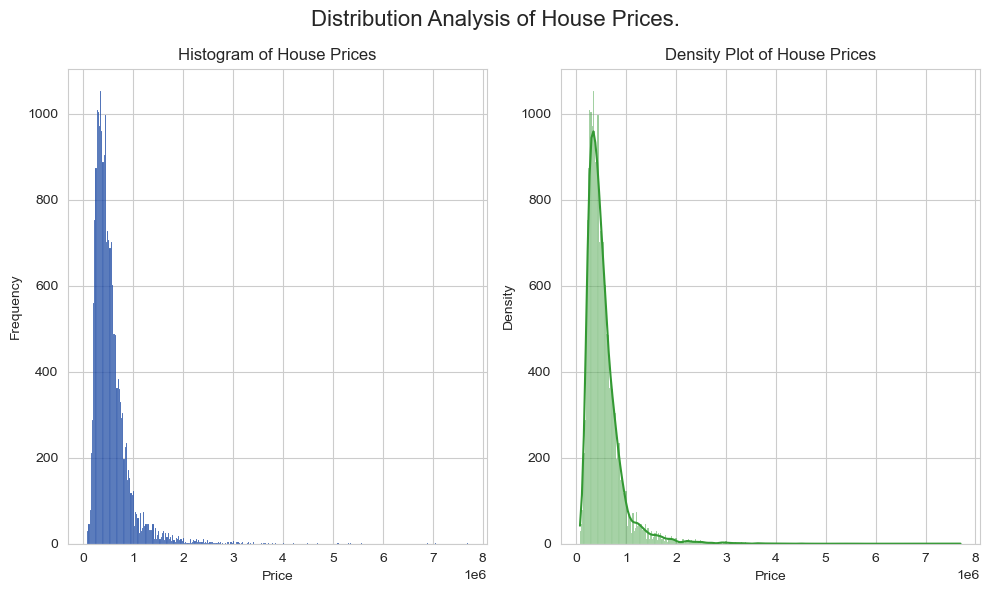

In [87]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Histogram
sns.histplot(housing_data['price'], bins="auto", kde=False, color='#003399', ax=axes[0])
axes[0].set_title('Histogram of House Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Density Plot
sns.histplot(housing_data['price'], bins="auto", kde=True, color='#339933', ax=axes[1])
axes[1].set_title('Density Plot of House Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

# A common title
plt.suptitle('Distribution Analysis of House Prices.', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show();


The histogram depicts the distribution of house prices, with most bars are clustered towards the left, suggesting that a significant number of houses are priced lower. The density plot illustrates a curve representing the density of house prices. Similar to the histogram, the curve peaks sharply on the left and gradually tapers off, indicating a right-skewed distribution. 
<br>In summary, the majority of house prices are concentrated at the lower end, creating a skewed distribution.


**#Distribution of Bedrooms, Bathrooms and Floors.**

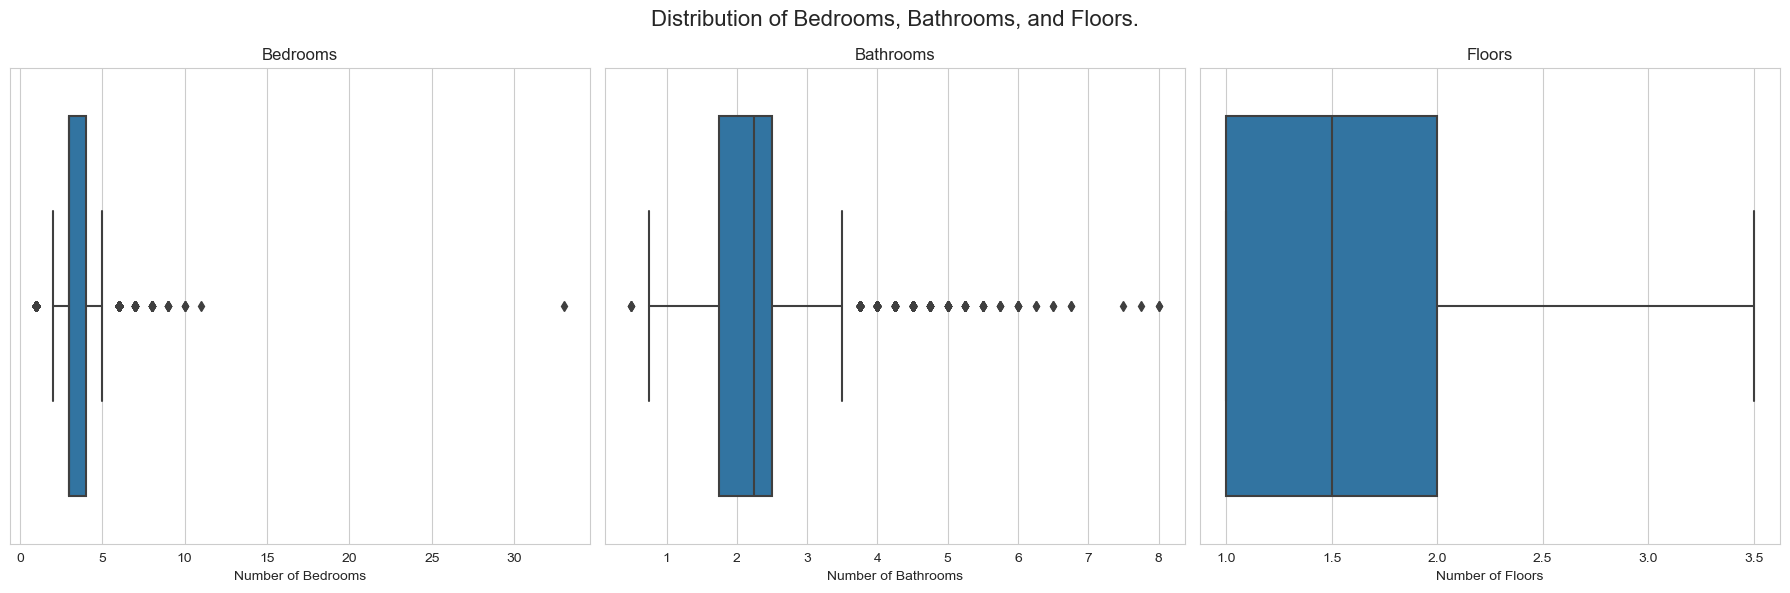

In [88]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Common title for all subplots
fig.suptitle('Distribution of Bedrooms, Bathrooms, and Floors.', fontsize=16)

# Box plot for bedrooms
sns.boxplot(x=housing_data['bedrooms'], ax=axes[0])
axes[0].set_title('Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')

# Box plot for bathrooms
sns.boxplot(x=housing_data['bathrooms'], ax=axes[1])
axes[1].set_title('Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')

# Box plot for floors
sns.boxplot(x=housing_data['floors'], ax=axes[2])
axes[2].set_title('Floors')
axes[2].set_xlabel('Number of Floors')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show();


After analyzing the distribution of bedrooms, bathrooms and floors, an outlier was detected in the bedroom column. To ensure the accuracy of our analysis, the outlier value was identified and subsequently removed from the dataset. The box plot below displays the distribution of bedrooms after excluding the outlier value. 

In [89]:
# Identify the outlier value
outlier_value = housing_data['bedrooms'].max()  

# Filter the DataFrame to exclude the outlier
housing_data = housing_data[housing_data['bedrooms'] != outlier_value]

Text(0.5, 0, 'Number of Bedrooms')

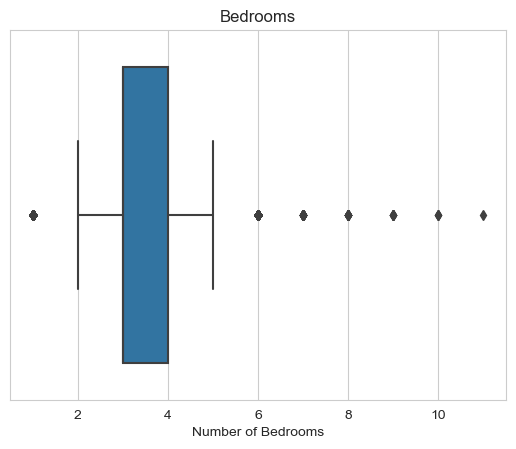

In [90]:
# Box plot for bedrooms
sns.boxplot(x=housing_data['bedrooms'])
plt.title('Bedrooms')
plt.xlabel('Number of Bedrooms')

### b.) Bivariate Analysis

**#Total Square Footage of houses by Price Range.**

In [94]:
# Define the labels with ranges
labels = ["70K-100K", "100K-300K", "300K-600K", "600K-1M", "1M-2M", "2M-5M", "5M-8M"]

# Cut the data into the specified ranges and assign labels
housing_data.loc[:,"price_range"] = pd.cut(housing_data.price,
                                            bins=[70000, 100000, 300000, 600000, 1000000, 2000000, 5000000, 8000000],
                                            labels=labels)

# Count the occurrences of each category
housing_data['price_range'].value_counts()


price_range
300K-600K    10560
600K-1M       4691
100K-300K     4433
1M-2M         1234
2M-5M          187
70K-100K        30
5M-8M            7
Name: count, dtype: int64

In [95]:
housing_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age,renovation_age,total_sqft,price_range
1188,2624049185,2014-09-09,405000.0,3,1.75,1760,5355,1.0,0,3.0,...,1160,600.0,1956,0.0,1790,6225,68,0.0,8875.0,300K-600K
20611,2895800390,2014-08-07,359800.0,5,2.50,2170,2752,2.0,0,3.0,...,2170,0.0,2014,0.0,1800,2752,10,0.0,7092.0,300K-600K
2209,3438500339,2014-05-26,276000.0,3,1.00,1140,5000,1.0,0,3.0,...,1140,0.0,1960,0.0,1140,5000,64,0.0,7280.0,100K-300K
18431,4167960330,2015-01-09,270000.0,3,2.00,1820,7750,1.0,0,3.0,...,1820,0.0,1992,0.0,2080,8084,32,0.0,11390.0,100K-300K
11609,1972201550,2014-07-16,565000.0,4,1.00,1540,2452,1.5,0,4.0,...,1540,0.0,1906,0.0,1290,3360,118,0.0,5532.0,300K-600K


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


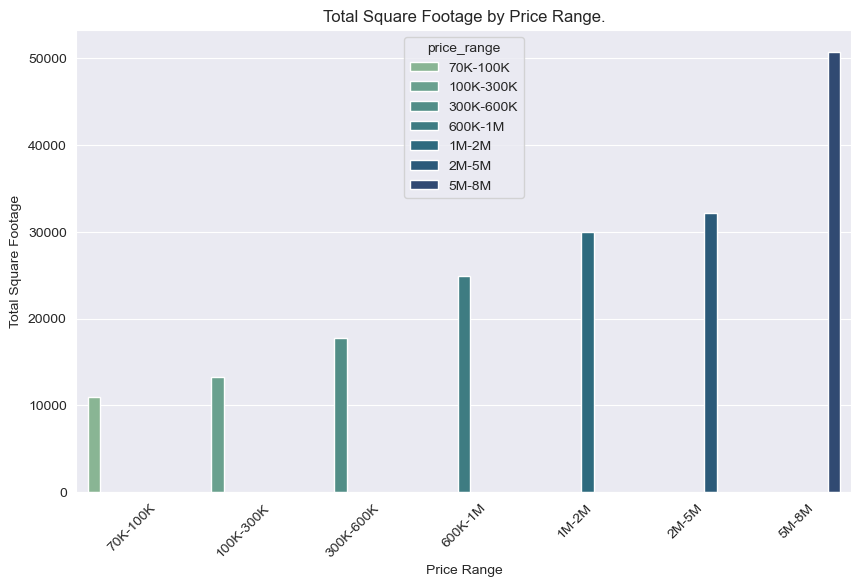

In [96]:

# Set the style of seaborn
sns.set_style("darkgrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="price_range", y="total_sqft", data=housing_data, errorbar=None, hue="price_range", palette="crest")
plt.title("Total Square Footage by Price Range.")
plt.xlabel("Price Range")
plt.ylabel("Total Square Footage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show();



The bar plot illustrates the relationship between price range and total square footage. Each bar represents the total square footage of houses within different price range categories. 
From the graph, it is evident that there is a positive association between house size and price. Specifically, larger houses, as indicated by higher total square footage, tend to command higher prices. 
<br>This suggests that there is a tendency for bigger houses to have a higher price, indicating a positive correlation between the size of the property and its price.


**#Relationship between bedrooms, bathrooms, and house price**

Created a scatter plot to visualize the relationship.


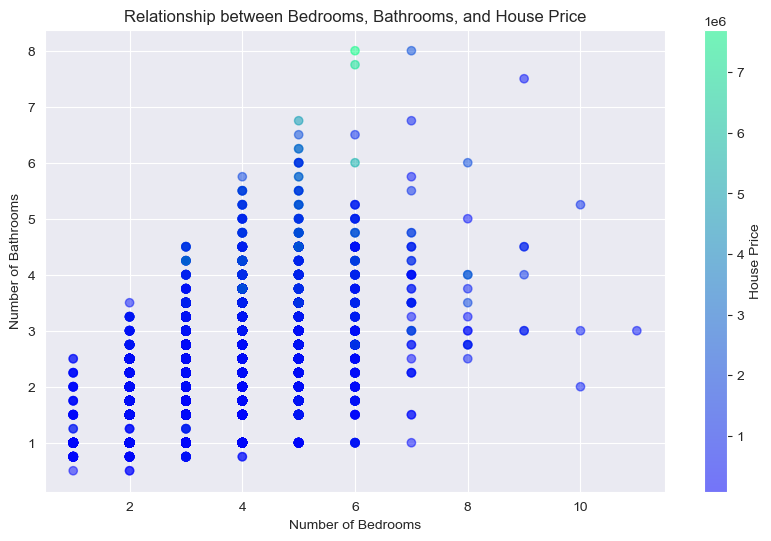

In [27]:
# plot for the relationship between bedrooms, bathrooms, and house price
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['bedrooms'], housing_data['bathrooms'], c=housing_data['price'], cmap='winter', alpha=0.5)
plt.colorbar(label='House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Relationship between Bedrooms, Bathrooms, and House Price')
plt.grid(True)
plt.show();


The scatter plot reveals a clear relationship between the number of bedrooms, bathrooms, and house prices. It indicates that houses with more bedrooms and bathrooms tend to command higher prices, reflecting buyer preferences for space and convenience. However, there's a diminishing return on the value added by additional bedrooms beyond a certain point. Understanding this relationship is crucial for both the real estate companies(sellers) and buyers in the real estate market, allowing them to make informed decisions based on their needs and market dynamics.
A house with a good balance of bedrooms and bathrooms tends to attract a wider range of potential buyers.

**#House age and house price**

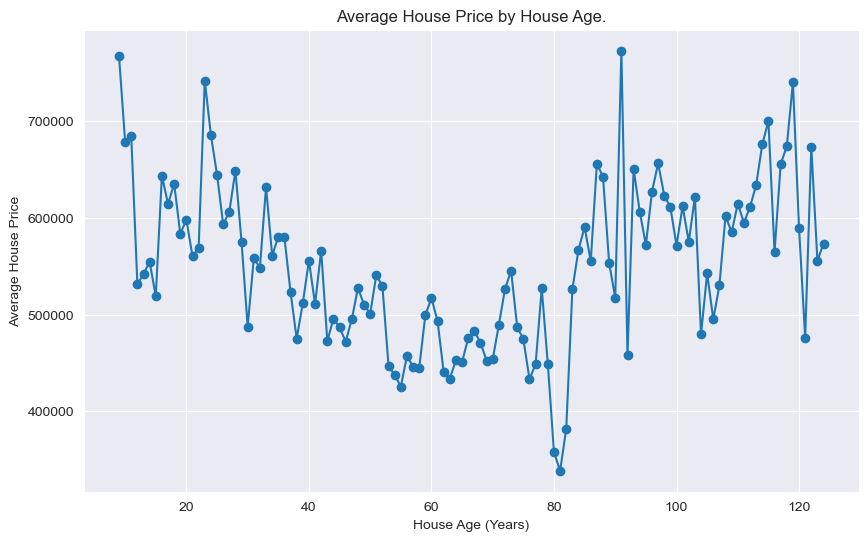

In [97]:
# Line plot for house age vs. average house price
average_price_by_age = housing_data.groupby('house_age')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_age.index, average_price_by_age.values, marker='o', linestyle='-')
plt.xlabel('House Age (Years)')
plt.ylabel('Average House Price')
plt.title('Average House Price by House Age.')
plt.grid(True)
plt.show()


The scatter plot depicts the relationship between house age and prices; and reveals a lack of a clear linear trend. Instead, prices exhibit significant variation across different house ages. While the graph provides insights into how house prices fluctuate based on their age, no discernible pattern emerges. 
In summary, the graph shows how house prices fluctuate based on their age, but no specific pattern emerges. This suggests that other factors beyond house age play a more influential role in determining house prices.

**#Prices of houses in relation to their respective Condition and Grade**

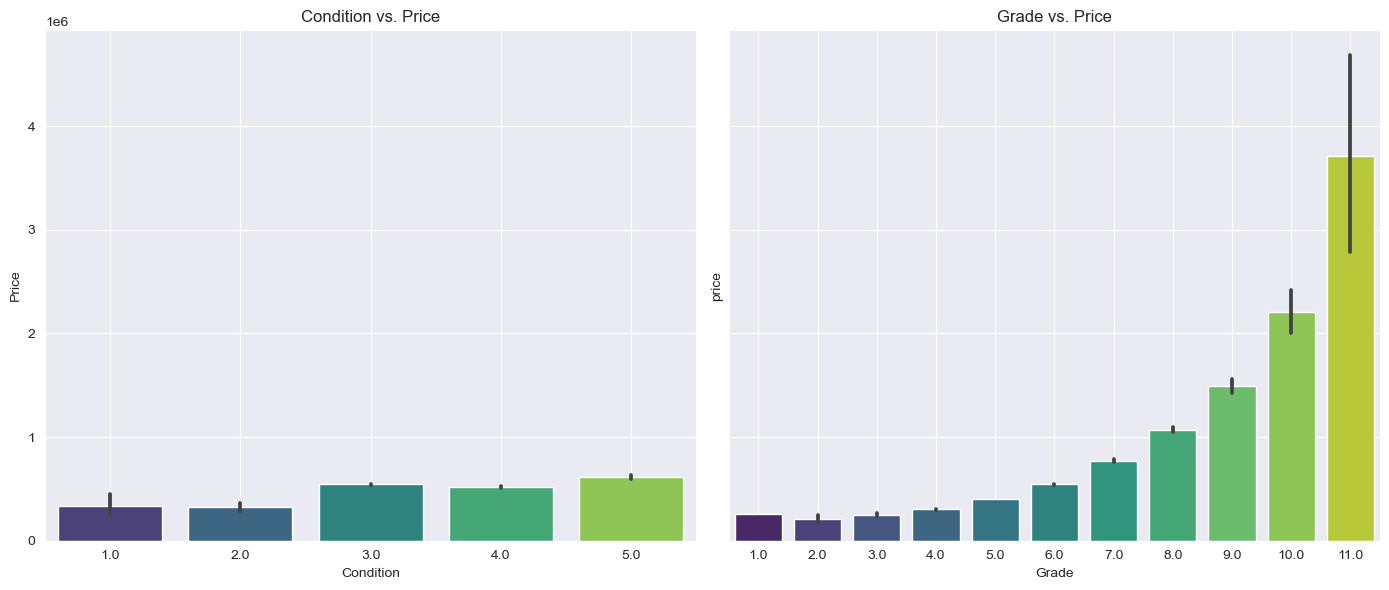

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Bar plot for condition vs. price
sns.barplot(x='condition', y='price', data=housing_data, ax=axes[0], palette='viridis')
axes[0].set_title('Condition vs. Price')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Bar plot for grade vs. price
sns.barplot(x='grade', y='price', data=housing_data, ax=axes[1], palette='viridis')
axes[1].set_title('Grade vs. Price')
axes[1].set_xlabel('Grade')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


The visualization presents comparisons between house prices and their condition and grade ratings. On the left, the condition of houses, rated from 1 to 5, shows relatively consistent prices across different condition levels, with no significant price increase observed for better conditions. Conversely, on the right, the grade of houses, ranging from 1 to 11, demonstrates a clear positive correlation with prices, indicating that higher-grade properties command higher prices.

### c.) Multivariate Analysis

##### **#Correlation matrix**

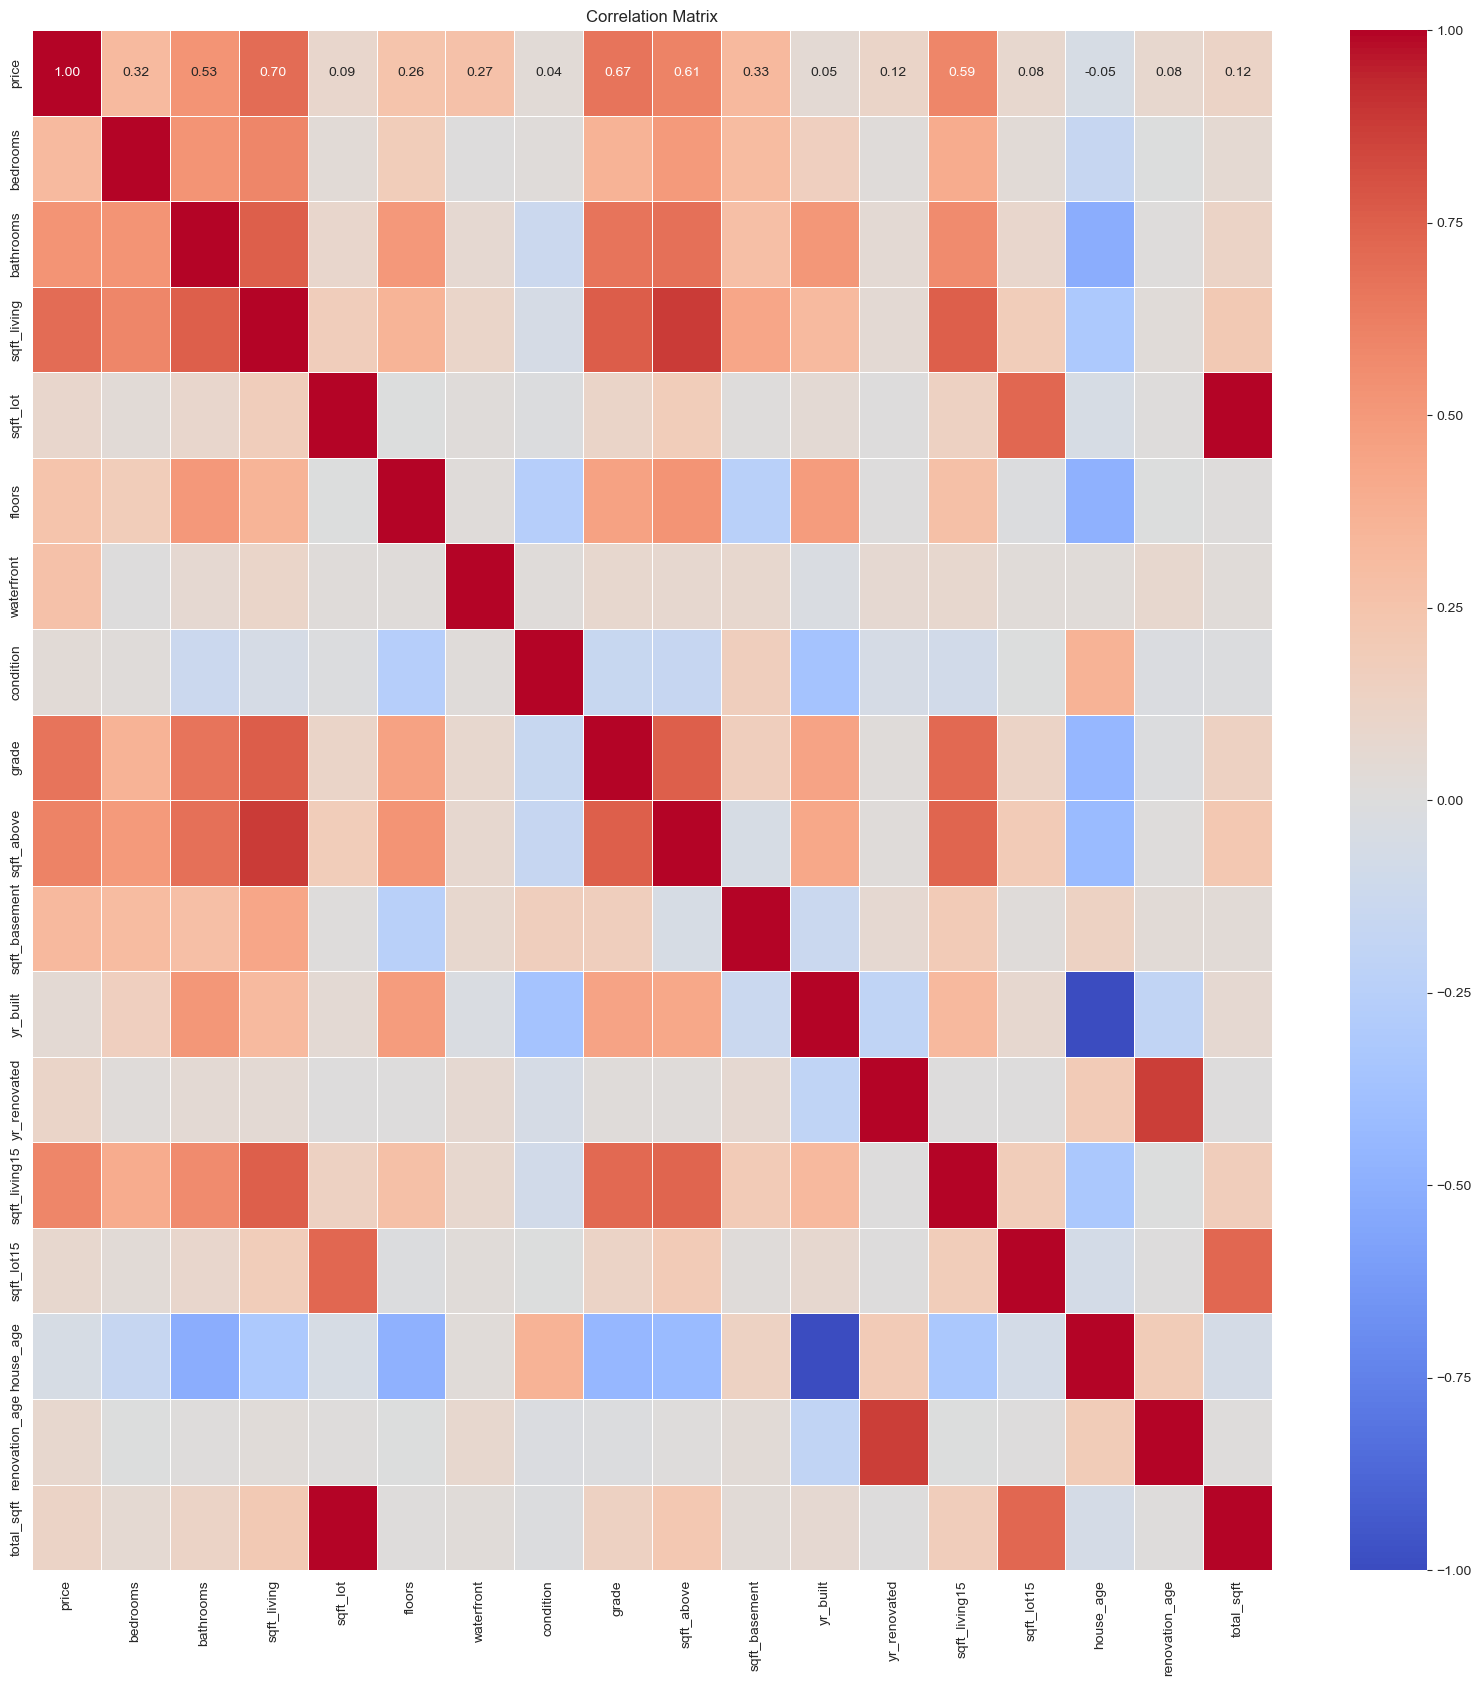

In [30]:
# Exclude the 'id', date and 'price_range' column from the correlation matrix
correlation_matrix = housing_data.drop(columns=['id', 'price_range', 'date']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


Price has a moderate positive correlation with sqft living (0.70), grade (0.67), sqft above (0.61). This means that as the values of these features increase, the price of the house also tends to increase.

# 4.STATISTICAL ANALYSIS.

Statistical analysis plays a crucial role in understanding relationships within datasets, identifying patterns, and gaining insights. In this regression modeling project aimed at predicting property values, several key steps in statistical analysis are essential:


1. Descriptive Statistics
2. Correlation matrix
3. Distribution Analysis
4. Inferential Statistics using Hypothesis Testing and Analysis of Variance
5. MultiColinierity

##### **a.) Descriptive Statistics**

Initial insights into the central tendency, dispersion, and shape of the data distribution.
<br>Understanding the characteristics of the data.

In [31]:
housing_data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age,renovation_age,total_sqft
count,2.114200e+04,21142,2.114200e+04,21142.000000,21142.000000,21142.000000,2.114200e+04,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,2.114200e+04
mean,4.581107e+09,2014-10-29 08:57:27.772206848,5.405060e+05,3.371157,2.116096,2080.942531,1.508757e+04,1.493615,0.006716,3.409848,5.658310,1789.104437,291.838095,1971.024359,68.259720,1987.302478,12739.322202,52.975641,0.955681,1.924945e+04
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,9.000000,0.000000,2.013000e+03
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,3.000000,5.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,27.000000,0.000000,8.820000e+03
50%,3.904940e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,5.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7626.000000,49.000000,0.000000,1.159350e+04
75%,7.309100e+09,2015-02-18 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069575e+04,2.000000,0.000000,4.000000,6.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10087.000000,72.000000,0.000000,1.546000e+04
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,11.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,124.000000,90.000000,1.653959e+06
std,2.876357e+09,NaN,3.680831e+05,0.902213,0.768545,918.563816,4.121013e+04,0.539252,0.081680,0.650422,1.174272,828.413341,442.504364,29.322166,362.774103,685.671655,27169.859971,29.322166,5.824659,4.156724e+04


**Price Distribution:**

The price of houses in the dataset varies widely, ranging from $78,000 to $7,700,000, with an average price of $540,506. The standard deviation of $368,083.1 indicates a significant dispersion around the mean, suggesting a diverse range of housing prices.

**Bedrooms and Bathrooms:** 

The average number of bedrooms is approximately 3.37, while the average number of bathrooms is about 2.12. The standard deviations for both variables are relatively small, indicating less variability compared to other features.

**Square Footage:**

 The average square footage of living space is around 2,080, with a standard deviation of 918.56. Similarly, the average lot size is approximately 15,087 square feet, with a larger standard deviation of 41,210.13, suggesting more variability in lot sizes compared to living space.

**Floors:**

On average, houses have 1.49 floors, with a standard deviation of 0.54. This indicates some variability in the number of floors, although most houses seem to have either one or two floors.

**Waterfront Property:**

 Only a small percentage (0.7%) of the houses are waterfront properties, based on the average value. This feature is likely represented as a binary variable (0 for no waterfront, 1 for waterfront), with most houses being non-waterfront properties.

**Condition and Grade:**

The average condition of houses is approximately 3.41, with a standard deviation of 0.65, suggesting some variability in the condition ratings. Similarly, the average grade is around 5.66, with a standard deviation of 1.17, indicating variations in the overall quality of houses.

**Year Built and Year Renovated:**

The houses in the dataset span a wide range of construction years, from 1900 to 2015, with an average year of construction around 1971. The standard deviation of 29.32 indicates some variability in the construction years. Additionally, the average year of renovation is approximately 68.26, with a standard deviation of 443.5, suggesting that most houses have not been renovated.

##### **b.) Correlation Analysis with House Prices**

Correlation analysis was performed to examine the relationship between various features and the target variable, 'price'. 
<BR>Here are the correlation coefficients between each feature and the price:


In [32]:
drop_var = ['id', 'price_range', 'date']

correlation = housing_data.drop(drop_var, axis=1).corrwith(housing_data['price'])
correlation

price             1.000000
bedrooms          0.316573
bathrooms         0.525899
sqft_living       0.702340
sqft_lot          0.087940
floors            0.256372
waterfront        0.265970
condition         0.035264
grade             0.667751
sqft_above        0.605167
sqft_basement     0.325003
yr_built          0.054471
yr_renovated      0.116721
sqft_living15     0.586441
sqft_lot15        0.083196
house_age        -0.054471
renovation_age    0.082356
total_sqft        0.118225
dtype: float64

These correlation coefficients indicate the strength and direction of the linear relationship between each feature and the price of the houses.
<br> Features with higher positive correlation coefficients, such as 'sqft_living', 'grade', 'bathrooms', and 'sqft_above', have a stronger positive linear relationship with the price, indicating that as these feature values increase, the price tends to increase as well. Conversely, features with low or negative correlation coefficients, such as 'condition', 'yr_built', 'sqft_lot', and 'house_age', have weaker or negative linear relationships with the price.
<br>However, it's imperative to underscore that correlation does not imply causation. There could be an underlying third factor driving changes in both features, underscoring the need for thorough investigation beyond correlation analysis.

##### **c.) Distribution Analysis**

Distribution analysis involves understanding the distribution of data, such as whether it follows a normal distribution and skewed distribution

In [33]:
from scipy.stats import skew

# Select numerical variables only
numerical_data = housing_data.select_dtypes(include=['number'])

# Compute skewness for each numerical variable
skewness = numerical_data.apply(lambda x: skew(x.dropna()))

# Select variables with skewness above a certain threshold (e.g., 0.5)
skewed_variables = skewness[abs(skewness) > 0.5].index

# Log transformation for skewed variables
df_log = housing_data.copy()  # Create a copy of the original DataFrame to preserve the original data
df_log[skewed_variables] = housing_data[skewed_variables].apply(lambda x: np.log1p(x))

# Check the distributions before and after transformation if needed
# For example, you can use histograms or density plots to visualize the distributions

# Print the first few rows of the transformed data to verify
df_log.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age,renovation_age,total_sqft,price_range
0,7129300520,2014-10-13,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,1.386294,...,7.074117,0.000000,1955,0.000000,7.201171,8.639588,69,0.000000,8.988571,100K-300K
1,6414100192,2014-12-09,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,1.386294,...,7.682943,5.993961,1951,7.596894,7.433075,8.941153,73,3.526361,9.424080,300K-600K
2,5631500400,2015-02-25,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,1.386294,...,6.647688,0.000000,1933,0.000000,7.908755,8.995041,91,0.000000,9.353661,100K-300K
3,2487200875,2014-12-09,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,1.791759,...,6.957497,6.814543,1965,0.000000,7.215975,8.517393,59,0.000000,9.096163,600K-1M
4,1954400510,2015-02-18,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,1.386294,...,7.427144,0.000000,1987,0.000000,7.496097,8.923191,37,0.000000,9.344959,300K-600K


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

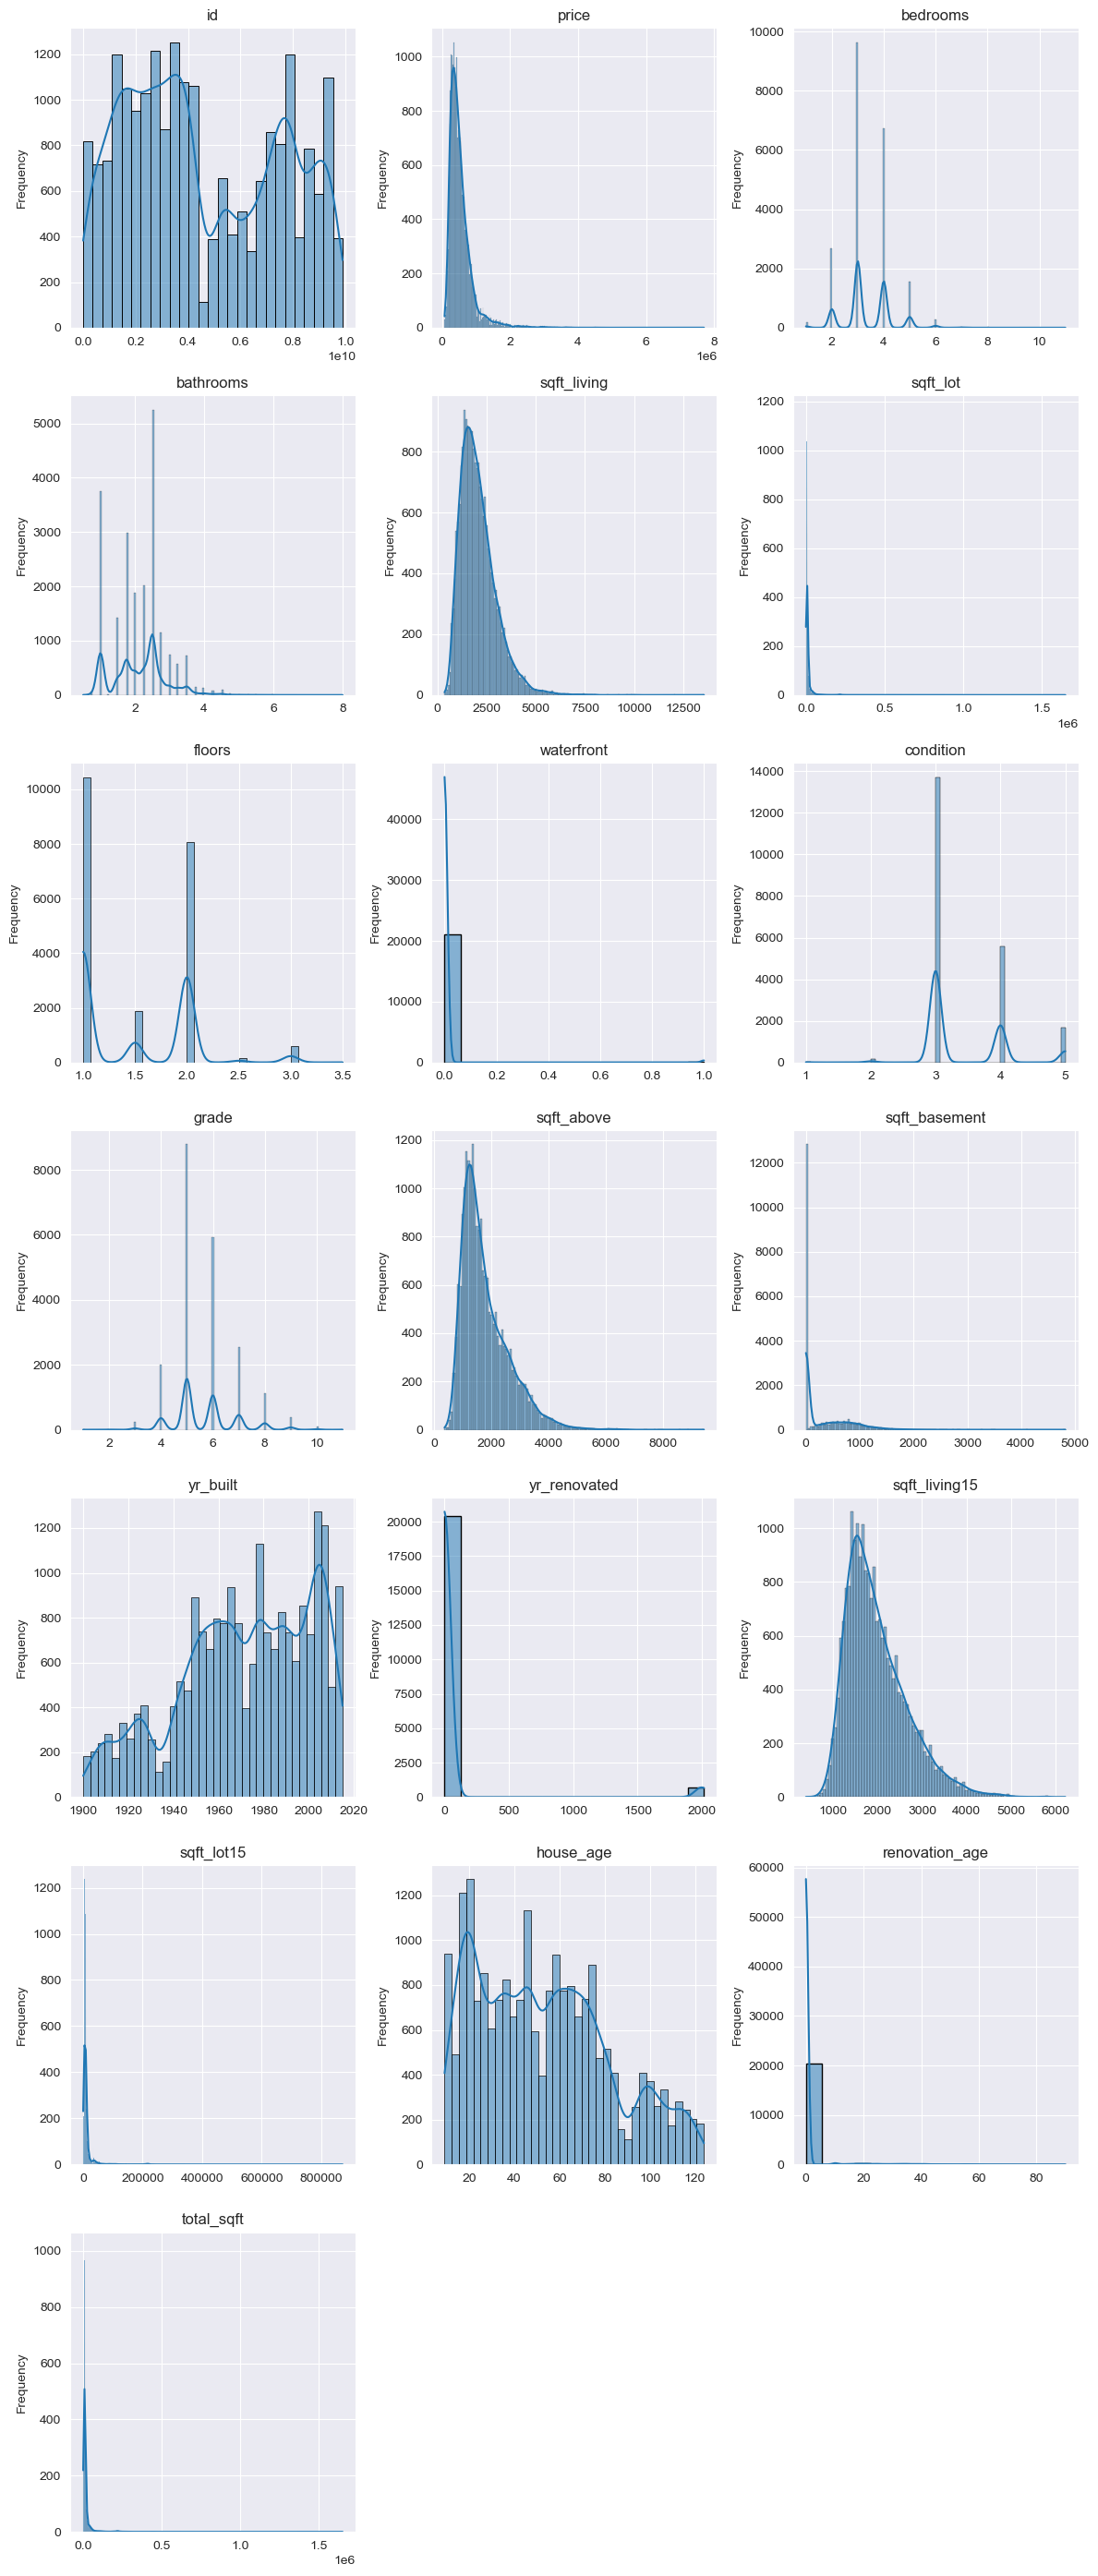

In [34]:
# Selecting numerical columns
numerical_columns = housing_data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed, rounding up

# Plot histograms for numerical variables
plt.figure(figsize=(12, num_rows * 4))  # Adjust the height based on the number of rows
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(housing_data[col], kde=True, edgecolor='black')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Conclusion**

In conclusion, the log transformation has effectively addressed skewness in the distribution of numerical variables within the dataset. Prior to transformation, variables such as house price, bedrooms, bathrooms, and various square footage measurements exhibited skewed distributions with long tails. However, after applying the log transformation, these distributions appear to be more symmetric and closer to a normal distribution. This transformation has enhanced the suitability of the data for statistical analysis by reducing skewness and improving the interpretability of the variables. It's important to acknowledge that while the log transformation has provided valuable improvements, it alters the scale and interpretation of the variables, necessitating careful consideration in subsequent analyses. Overall, the transformed variables are now better suited for further statistical modeling and analysis in the context of predicting property values and understanding real estate market trends.

##### **d.) Inferential Statistics.**

*We used one-way ANOVA approach*

In [35]:

from scipy.stats import f_oneway

# List of features of interest
features_of_interest = ['bedrooms', 'bathrooms', 'sqft_living',
                        'sqft_lot', 'floors', 'waterfront', 'condition', 
                        'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                        'yr_renovated', 'sqft_living15', 'sqft_lot15', 
                        'house_age', 'renovation_age', 'total_sqft']

# Create an empty DataFrame to store ANOVA results
anova_results = pd.DataFrame(index=['F-statistic', 'P-value'])

# Perform ANOVA for each feature
significant_features = []

for i, column in enumerate(features_of_interest, 1):
    groups = [housing_data[column][housing_data['price'] == category]
              for category in housing_data['price'].unique()]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Store results in the DataFrame
    anova_results[column] = [f_statistic, p_value]

    # Print interpretation
    if p_value < 0.05:
        significant_features.append(column)
        print(f"{i}. \033[1m{column}\033[0m: Reject the null hypothesis. There is a statistically significant relationship.")
    else:
        print(f"{i}. \033[1m{column}\033[0m: Fail to reject the null hypothesis. There is no statistically significant relationship.")

# Display ANOVA results
anova_results


1. bedrooms: Reject the null hypothesis. There is a statistically significant relationship.
2. bathrooms: Reject the null hypothesis. There is a statistically significant relationship.
3. sqft_living: Reject the null hypothesis. There is a statistically significant relationship.
4. sqft_lot: Fail to reject the null hypothesis. There is no statistically significant relationship.
5. floors: Reject the null hypothesis. There is a statistically significant relationship.
6. waterfront: Reject the null hypothesis. There is a statistically significant relationship.
7. condition: Reject the null hypothesis. There is a statistically significant relationship.
8. grade: Reject the null hypothesis. There is a statistically significant relationship.
9. sqft_above: Reject the null hypothesis. There is a statistically significant relationship.
10. sqft_basement: Reject the null hypothesis. There is a statistically significant relationship.
11. yr_built: Reject the null hypothesis. There is a statisti

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,house_age,renovation_age,total_sqft
F-statistic,1.841471e+00,3.728667,7.702589,0.732713,1.662592e+00,1.787176e+00,1.051111,7.29306,5.098114,1.750817e+00,1.236748e+00,1.046716,5.209978,0.709841,1.236748e+00,1.171737e+00,0.775778
P-value,1.765957e-139,0.000000,0.000000,1.000000,1.808184e-95,1.258742e-125,0.026289,0.00000,0.000000,1.406487e-116,2.417229e-17,0.037943,0.000000,1.000000,2.417229e-17,2.430304e-10,1.000000


**Conclusion**

The features listed under "Reject the Null Hypothesis" have a statistically significant relationship with housing prices.

These features are important predictors of housing prices in the given dataset.

On the other hand, features listed under "Fail to Reject the Null Hypothesis" do not show a statistically significant relationship with housing prices based on the ANOVA test.

##### **e.) Multicollinearity.**

**Assessing Multicollinearity with Variance Inflation Factor (VIF)**
<br>In this analysis, we utilize the Variance Inflation Factor (VIF) to investigate multicollinearity among predictor variables in our regression model. Multicollinearity occurs when predictor variables are highly correlated with each other, which can lead to unreliable coefficient estimates. By computing the VIF for each predictor variable, we identify potential multicollinearity issues among property characteristics. 
<br>High VIF values indicate a strong correlation between a predictor variable and the other variables in the model. Hence, it's crucial to examine the VIF values to ensure the reliability of our regression analysis and to address any multicollinearity detected.


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute Variance Inflation Factor (VIF) to detect multicollinearity

X = housing_data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovation_age', 'total_sqft']]
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF for each feature
print("\n\033[1mVariance Inflation Factor (VIF):\033[0m")
vif_data


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF):


,Feature,VIF
0,bedrooms,1.688154
1,bathrooms,3.366371
2,sqft_living,inf
3,sqft_lot,inf
4,floors,1.934470
5,waterfront,1.028593
6,condition,1.218261
7,grade,3.235515
8,sqft_above,inf
9,sqft_basement,inf


**Variance Inflation Factor (VIF) Analysis**
<br>The Variance Inflation Factor (VIF) was calculated to assess multicollinearity among the features in the dataset. A VIF value greater than 5 is typically considered indicative of multicollinearity. The results revealed that most features exhibited low levels of multicollinearity, with VIF values below 5. 
<br>However, 'yr_built' displayed a remarkably high VIF of 94.56, indicating strong multicollinearity with other features. Additionally, 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', and 'total_sqft' exhibited infinite VIF values, suggesting perfect multicollinearity. 
<br>Addressing multicollinearity in this case may require further investigation, such as feature selection, dimensionality reduction techniques or applying regularization methods to mitigate multicollinearity effects and improve model performance. 
<br>Overall, understanding the VIF values can help refine the regression model and ensure the reliability of the coefficient estimates.


# MODELLING.

1. Baseline model - simple linear model.
2. log transformation. 
3. Multiple Linear Regression
4. Residual modelling.


Baseline model 

 Baseline models provide a reference point for comparing the performance of more complex models. 
 Its purpose is to establish a benchmark against which the performance of more sophisticated models can be evaluated.

FUNCTIONS TO BE USED.

In [37]:
#use only numeric columns.
def numeric_col(housing_data):
    '''returns a dataframe with only numeric values'''
    for column in housing_data.columns:
        if is_numeric_dtype(housing_data[column]) == False:
            housing_data = housing_data.drop(column, axis=1)
        else:
            continue
    return housing_data


In [38]:
#Set a function for the predictor and target variale.
def X_Y(housing_data, target):
    '''Returns a series of target (y) values and a DataFrame of predictors (X)'''
    y = housing_data[target]  # target variable
    X = housing_data.drop(target, axis=1)  # predictor features
    return y, X


In [39]:

#A higher train score indicates that the model fits the training data well.
#A high test score suggests that the model is able to make accurate predictions on data it hasn't seen before, which is the ultimate goal in machine learning.

def get_metrics(X_train, X_test, y_train, y_test):
    ''' Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and returns metrics'''

    # Initialize Linear Regression model
    lr = LinearRegression()

    lr.fit(X_train, y_train)

    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

    return train_score, test_score, train_rmse, test_rmse
#These scores provide insights into how well the model is performing both on the data it was trained on and on new data.
# They help assess the model's overall effectiveness and whether it is overfitting or underfitting.








In [40]:
def train_test(housing_data, size=0.20):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(housing_data, test_size=size, random_state=42)
    return train_set, test_set


# SIMPLE LINEAR REGRESSION.

In [42]:


def simple_linear_regression(housing_data):
    '''Creates a simple linear regression model with prices as the target variable 
    and the number of bedrooms as the predictor. Returns the model along with R-squared, 
    Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for both train and test sets.'''
    
    # Extracting features and target variable
    X = housing_data[['sqft_living']]  # Predictor feature
    y = housing_data['price']  # Target variable (prices)
    
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Calculate predictions for train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R-squared for train and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Calculate Mean Squared Error (MSE) for train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Calculate Root Mean Squared Error (RMSE) for train and test sets
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    # Print coefficients, R-squared, MSE, and RMSE for train and test sets
    print("Training set:")
    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])
    print("R-squared:", r2_train)
    print("Mean Squared Error:", mse_train)
    print("Root Mean Squared Error:", rmse_train)
    
    print("\nTest set:")
    print("R-squared:", r2_test)
    print("Mean Squared Error:", mse_test)
    print("Root Mean Squared Error:", rmse_test)
    
    return model, r2_train, mse_train, rmse_train, r2_test, mse_test, rmse_test


# Example usage:
# Assuming housing_data is your dataset
# model, r2_train, mse_train, rmse_train, r2_test, mse_test, rmse_test = simple_linear_regression(housing_data)


In [43]:
simple_linear_regression(housing_data)


Training set:
Intercept: -44593.95245340909
Coefficient: 281.4088930446383
R-squared: 0.49587806055811734
Mean Squared Error: 68601152192.940285
Root Mean Squared Error: 261918.21661148407

Test set:
R-squared: 0.48264829402430887
Mean Squared Error: 68845100756.10751
Root Mean Squared Error: 262383.4993975565


(LinearRegression(),
 0.49587806055811734,
 68601152192.940285,
 261918.21661148407,
 0.48264829402430887,
 68845100756.10751,
 262383.4993975565)

#

Intercept: This is like the starting point or baseline of our predictions. For example, if all other factors were zero, we'd expect the value to be around -44593.95. It's where our line would intersect the y-axis on a graph.


Coefficient: This tells us how much the predicted value changes for each unit increase in the independent variable. In this case, for every one-unit increase in the independent variable, we'd expect the dependent variable to increase by about 281.41.


R-squared: This is a measure of how well our model explains the variation in the data. An R-squared value of 0.49 means that about 49% of the variability in the dependent variable is explained by our model. So, it's doing a decent job, but there's still room for improvement.


Mean Squared Error (MSE): This tells us, on average, how much our predictions differ from the actual values in the training data. Here, the average squared difference is around 68601152192.94, which is quite large but it's relative to the scale of the dependent variable.


Root Mean Squared Error (RMSE): This is just the square root of the MSE. It gives us an idea of the average amount our predictions are off by. Here, it's around 261918.22, which is the typical difference between our predicted values and the actual values in the training data.


Test Set:

R-squared: Similar to the training set, this tells us how well our model explains the variation in the test data. An R-squared value of 0.48 means that about 48% of the variability in the dependent variable is explained by our model when evaluated on the test data.


Mean Squared Error (MSE): This is the average squared difference between our predictions and the actual values in the test data. It's around 68845100756.11, similar to the MSE in the training set.


Root Mean Squared Error (RMSE): Again, this is just the square root of the MSE for the test data. It's around 262383.50, which is the typical difference between our predicted values and the actual values in the test data.












In [44]:
#STANDARDIZE OUR MODEL TO GET RID OF THE NEGATIVE INTERCEPT.


# Assuming you have your data loaded into X and y
# X should be your independent variables and y should be your dependent variable

# Split data into training and test sets
X = housing_data[['sqft_living']]  # Predictor feature
y = housing_data['price']  # Target variable (prices)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Fit the linear regression model on the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate R-squared and mean squared error on the test set
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Print the intercept and coefficients of the model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

#This code will scale your data using StandardScaler, which standardizes features by removing the mean and scaling to unit variance. 
#It ensures that the intercept is not negative

R-squared: 0.48264829402430875
Mean Squared Error: 68845100756.10753
Root Mean Squared Error: 262383.4993975565
Intercept: 540631.1560929463
Coefficients: [259767.82181675]


R-squared (0.48): This value indicates that approximately 48% of the variability in the dependent variable (the house prices) is explained by the independent (sqft living). In simpler terms, the model captures about 48% of the patterns in the data.


Mean Squared Error (MSE) (68845100756.11): This is the average squared difference between the actual values and the predicted values from the model. It's a measure of the model's accuracy, where lower values indicate better performance. In this case, the average squared difference is quite large, indicating that there's still room for improvement in the model's predictive accuracy.


Root Mean Squared Error (RMSE) (262383.50): This is the square root of the MSE and provides a measure of the typical deviation of the predicted values from the actual values. It's in the same units as the dependent variable. Here, the RMSE indicates that, on average, the predicted values differ from the actual values by approximately 262,383.50 units.


Intercept (540631.16): This is the estimated value of the dependent variable when all independent variables are set to zero. In this case, it suggests that when all other factors are zero, we would expect the dependent variable to be around 540,631.16.


Coefficient (259767.82): This represents the change in the house prices for a one-unit change in the sqft living, while holding other variables constant. In this case, for every one-unit increase in the sqft living, we'd expect the house prices to increase by approximately 259,767.82 units.


Overall, the model suggests that there is a positive relationship between the independent and dependent variables. However, given the moderate R-squared value and the relatively high MSE and RMSE, it's clear that there may be other factors influencing the dependent variable that are not captured by the model. Further investigation or refinement of the model may be needed to improve its predictive performance.

# MULTIPLE LINEAR REGRESSION.

In [63]:


# Define a function to keep only numeric columns
def only_numeric(housing_data):
    '''returns a DataFrame with only numeric values'''
    numeric_columns = [column for column in housing_data.columns if is_numeric_dtype(housing_data[column])]
    return housing_data[numeric_columns]

# Sample features and target variable
features = ['bathrooms', 'sqft_living',
            'floors', 'waterfront', 'condition', 'grade',
            'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15']
target = 'price'

# Load your housing data (assuming it's already loaded into 'housing_data' DataFrame)

# Keep only numeric columns
housing_data_numeric = only_numeric(housing_data)

# Check if all features exist in the DataFrame
missing_features = [feature for feature in features if feature not in housing_data_numeric.columns]
if missing_features:
    print("The following features are not present in the dataset:", missing_features)
else:
    # Extract features and target variable
    X = sm.add_constant(housing_data_numeric[features])
    y = housing_data_numeric[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build a basic linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Display coefficients
    coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
    print(coefficients)


Mean Squared Error: 47548419769.890594
R-squared: 0.6426869041626193
          Feature    Coefficient
0           const       0.000000
1       bathrooms   24855.944322
2     sqft_living  117349.853313
3          floors   20057.401179
4      waterfront   63378.047594
5       condition   11809.217548
6           grade  154829.185004
7   sqft_basement   14434.666872
8        yr_built -108064.021718
9    yr_renovated    7255.426167
10  sqft_living15   25765.797630


Mean Squared Error (MSE): The MSE is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is approximately 
4.75
×
1
0
10
4.75×10 
10


 , which means, on average, the squared difference between the actual housing prices and the predicted prices is 
4.75
×
1
0
10
4.75×10 
10
 .


R-squared (
𝑅
2
R 
2


 ): The 
𝑅
2
R 
2
  score measures the proportion of the variance in the target variable (housing prices) that is explained by the independent variables (features) in the model. 
  
  An 
𝑅
2
R 
2
  score of 0.643 means that approximately 64.3% of the variance in housing prices is explained by the features included in the model. In other words, the model accounts for 64.3% of the variability in housing prices.


Coefficients:
Intercept (const): The intercept represents the estimated housing price when all independent variables are zero.


bathrooms: For each additional bathroom, the predicted housing price increases by approximately $24,855.


sqft_living: For each additional square foot of living space, the predicted housing price increases by approximately $117,350.


floors: Houses with an additional floor have a predicted price increase of approximately $20,057.


waterfront: Properties with waterfront views have a predicted price increase of approximately $63,378 compared to those without.


condition: Better condition properties (on a scale from 1 to 5) tend to have a predicted price increase of approximately $11,809 for each unit increase in condition.

grade: Higher grade properties (on a scale from 1 to 13) have a predicted price increase of approximately $154,829 for each unit increase in grade.


sqft_basement: For each additional square foot of basement space, the predicted price increases by approximately $14,435.


yr_built: Each additional year of age decreases the predicted price by approximately $108,064.


yr_renovated: For each year renovated, the predicted price increases by approximately $7,255.


sqft_living15: For each additional square foot of living space in the nearest 15 neighbors' homes, the predicted price increases by approximately $25,766.


These coefficients indicate the strength and direction of the relationship between each feature and the target variable, holding other features constant. For example, features like square footage of living space, grade, and whether the property has a waterfront view have a substantial positive impact on the predicted housing price, while the year the property was built has a negative impact.









In [64]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3768.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        13:34:57   Log-Likelihood:            -2.9014e+05
No. Observations:               21142   AIC:                         5.803e+05
Df Residuals:                   21131   BIC:                         5.804e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.604e+06   1.41e+05     46.979

R-squared (R²): The coefficient of determination is 0.641, indicating that approximately 64.1% of the variance in the housing prices is explained by the independent variables included in the model.


Adjusted R-squared: The adjusted R-squared is also 0.641, which adjusts for the number of predictors in the model. It's useful when comparing models with different numbers of predictors.


F-statistic: The F-statistic is 3768, with a p-value close to zero, indicating that the overall model is statistically significant.


The standard errors, condition number, and other diagnostic information are also provided. 
The condition number being large (3.35e+05) suggests that there may be strong multicollinearity or other numerical issues in the model. 


c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


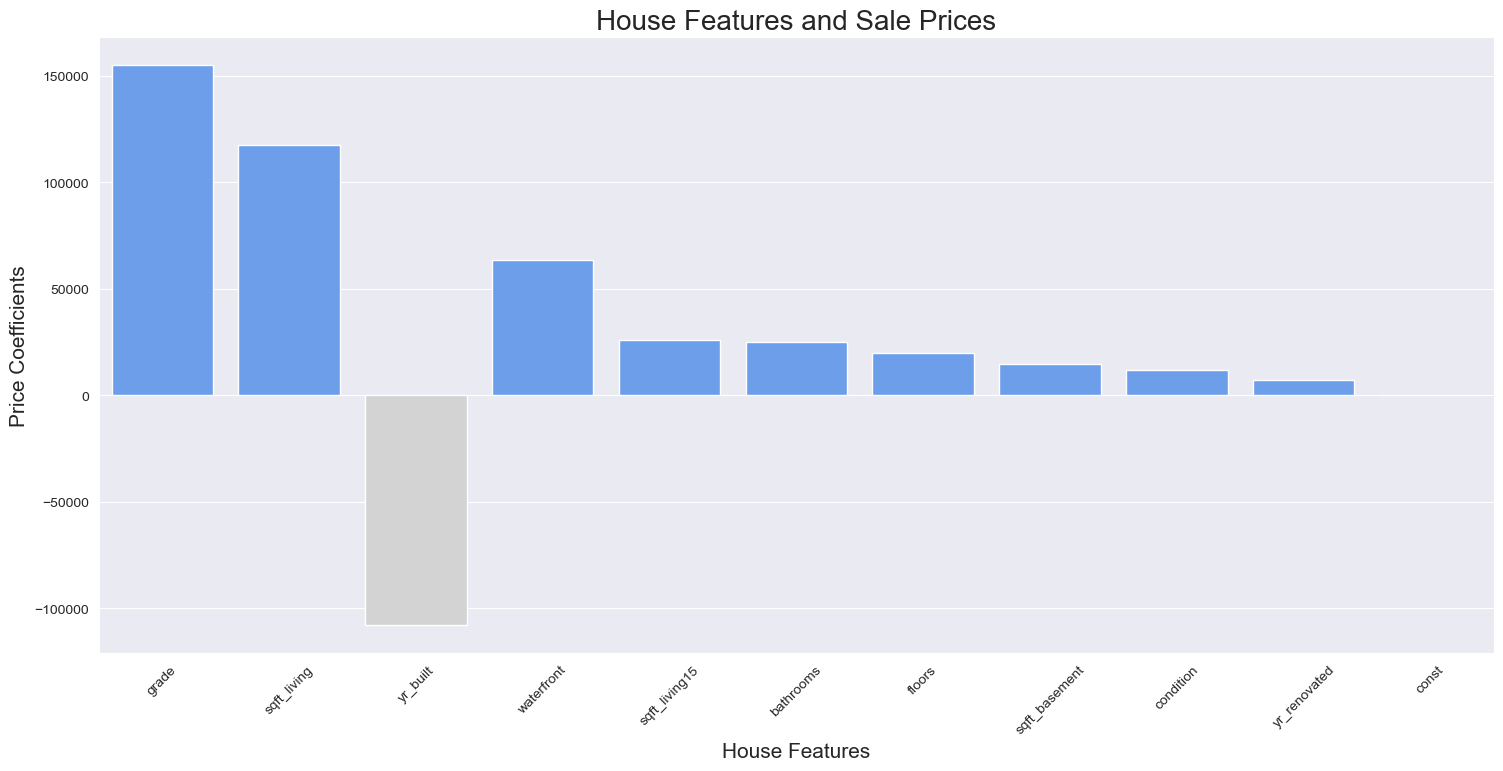

In [65]:
inf_coefs = list(zip(coefficients["Feature"], coefficients["Coefficient"]))
inf_coefs.sort(key=lambda x: abs(x[1]), reverse=True)  # Sort coefficients by absolute value

# Create a color palette with the specified color
color = "#589aff"
colors = [color if coef[1] > 0 else "lightgray" for coef in inf_coefs]

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.barplot(x=[x[0] for x in inf_coefs], y=[x[1] for x in inf_coefs], palette=colors)
plt.xticks(rotation=45)
ax.set_ylabel("Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Sale Prices", fontsize=20);


The model identifies the main factors that affect house prices, giving useful advice to real estate companies when they help customers. It's not perfect, but it does an okay job with a 63.1% score. We still need to check if it can predict prices well. However, the model does its job by helping with decisions and making marketing better by using details about houses and the market.

We can see the positive correlation between the house prices and all other features except the year built which indicates a negative correlation.


Addressing negative correlations in house prices, such as with the year built, is crucial. Older properties often have lower prices due to depreciation and maintenance issues. However, strategic renovations, updates, and modernization efforts offer opportunities to increase their value. Homeowners and investors can enhance the appeal and value of older properties in the market by undertaking such initiatives.

# RESIDUALS

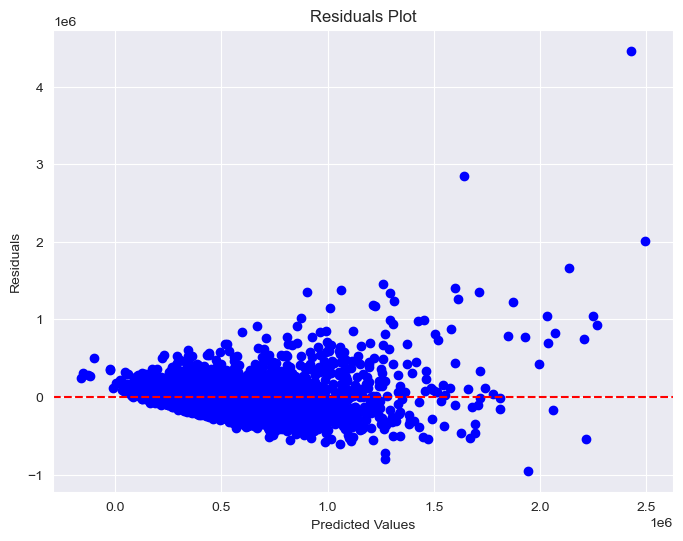

In [66]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


This plot is useful in understanding the assumptions of linear regression and detecting violations. The ideal case is to see a random distribution of residuals around the y-axis, centered around zero. This suggests that the residuals are normally distributed, and there are no systematic patterns in the errors

# POLYNOMIAL REGRESSION.

Polynomial regression is a type of regression analysis where the relationship between the independent variable (or variables) and the dependent variable is modeled as an nth degree polynomial. Unlike simple linear regression, which assumes a linear relationship between the variables, polynomial regression can capture more complex relationships by introducing polynomial terms.

In polynomial regression, the relationship between the independent variable 
𝑥
x and the dependent variable 
𝑦
y is modeled as:

𝑦

=
𝛽
0
+
𝛽
1
𝑥
+
𝛽
2
𝑥
2
+
𝛽
3
𝑥
3
+
.
.
.
+
𝛽
𝑛
𝑥
𝑛
+
𝜀
y=β 
0
​
 +β 
1
​
 x+β 
2
​
 x 
2
 +β 
3
​
 x 
3
 +...+β 
n
​
 x 
n
 +ε

In [49]:
features = ['bathrooms', 'sqft_living',
            'floors', 'waterfront', 'condition', 'grade',
            'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15']
target = 'price'

# Load your housing data (assuming it's already loaded into 'housing_data' DataFrame)

# Keep only numeric columns
housing_data_numeric = only_numeric(housing_data)

# Check if all features exist in the DataFrame
missing_features = [feature for feature in features if feature not in housing_data_numeric.columns]
if missing_features:
    print("The following features are not present in the dataset:", missing_features)
else:
    # Extract features and target variable
    X = sm.add_constant(housing_data_numeric[features])
    y = housing_data_numeric[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Polynomial Regression
# Choose the degree of the polynomial
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Model (Degree {})- MSE:".format(degree), mse_poly)
print("Polynomial Model (Degree {})- R-squared:".format(degree), r2_poly)



Polynomial Model (Degree 2)- MSE: 35637716070.71762
Polynomial Model (Degree 2)- R-squared: 0.7321925161881991


Mean Squared Error (MSE): This value represents the average squared difference between the actual house prices and the predicted prices by the polynomial model.
 A lower MSE indicates better performance, and in this case, the MSE is lower than the previous model's MSE, suggesting that the polynomial model fits the data better.


 
Generally,The 
𝑅
2
R 
2
  value for the first model is 0.641, indicating that approximately 64.1% of the variance in housing prices is explained by the independent variables included in the model. On the other hand, the 
𝑅
2
R 
2
  value for the polynomial model of degree 2 is 0.732, suggesting that approximately 73.2% of the variance in housing prices is explained by this polynomial model.

Comparing the two 
𝑅
2
R 
2
  values, we can see that the polynomial model of degree 2 explains more variance in housing prices compared to the first model. This suggests that the polynomial model provides a better fit to the data and captures more of the variability in housing prices.

# RESIDUALS

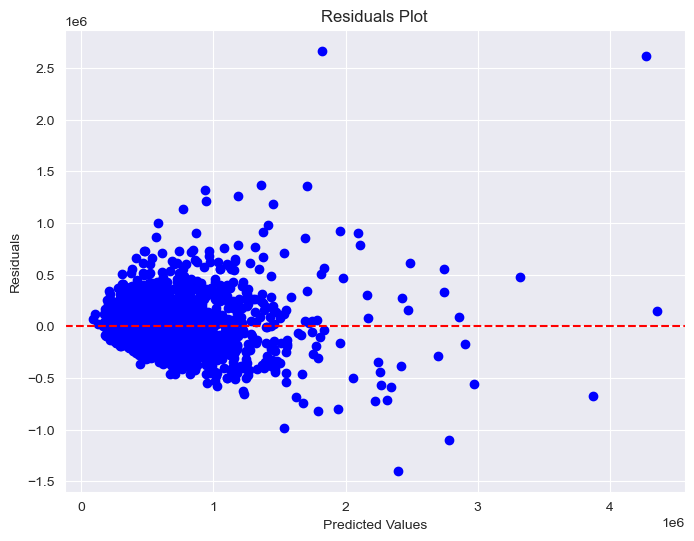

In [50]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_poly

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
#TEST FOR HOMOSCEDASCITICY

In [53]:
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate residuals
residuals = y_test - y_pred_poly



# Perform Breusch-Pagan test
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_test_poly)
print("Breusch-Pagan test p-value:", lm_p_value)


Breusch-Pagan test p-value: 3.975373048166964e-258


A p-value of 3.975373048166964e-258, which is extremely close to zero, indicates strong evidence against the null hypothesis of homoscedasticity. In other words, there is a significant presence of heteroscedasticity in your data.

Heteroscedasticity refers to the situation where the variability of a variable is unequal across the range of values of a second variable that predicts it. In the context of regression analysis, it means that the variance of the errors is not constant across observations.

# Log transformation.
Transforming the dependent variable or one or more independent variables can sometimes stabilize the variance. 
Common transformations include taking the natural logarithm, square root, or reciprocal of the variables.

Log transformation of the multiple linear regression.

In [106]:
import numpy as np

# Log transformation of features and target variable
X_log = np.log1p(X)
y_log = np.log1p(y)

# Split the log-transformed data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Standardize the log-transformed features
scaler_log = StandardScaler()
X_train_scaled_log = scaler_log.fit_transform(X_train_log)
X_test_scaled_log = scaler_log.transform(X_test_log)

# Build a linear regression model on the log-transformed data
model_log = LinearRegression()
model_log.fit(X_train_scaled_log, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test_scaled_log)

# Evaluate the model
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

# Display results
print("Mean Squared Error (Log Transformed):", mse_log)
print("R-squared (Log Transformed):", r2_log)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model_log.coef_})


Mean Squared Error (Log Transformed): 0.09804039958945562
R-squared (Log Transformed): 0.6469123715948973


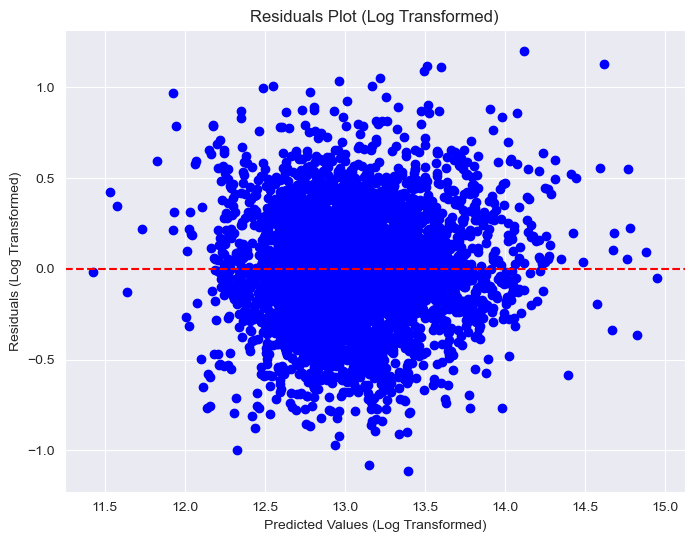

In [105]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_log = y_test_log - y_pred_log

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log, residuals_log, color='blue',)
plt.title('Residuals Plot (Log Transformed)')
plt.xlabel('Predicted Values (Log Transformed)')
plt.ylabel('Residuals (Log Transformed)')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


The model's residuals are randomly distributed, indicating no systematic bias. The log transformation visualizes residuals and patterns. A horizontal red line suggests linearity and normality are satisfied, but does not provide a definitive answer on model goodness fit and additional technique's could be used to assess the model.

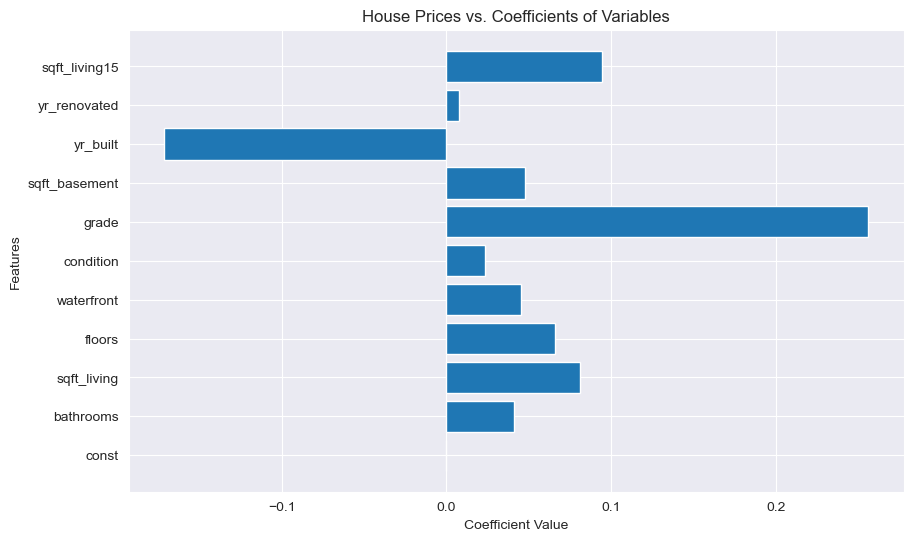

In [56]:
import matplotlib.pyplot as plt

# Plot house prices against coefficients
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model_log.coef_)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('House Prices vs. Coefficients of Variables')
plt.show()


visualization of the positive and negative coefficient variables.

Log transformation of the polynomial model

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define function to keep only numeric columns
def only_numeric(df):
    return df.select_dtypes(include=[np.number])

features = ['bathrooms', 'sqft_living',
            'floors', 'waterfront', 'condition', 'grade',
            'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15']
target = 'price'

# Load your housing data (assuming it's already loaded into 'housing_data' DataFrame)

# Keep only numeric columns
housing_data_numeric = only_numeric(housing_data)

# Check if all features exist in the DataFrame
missing_features = [feature for feature in features if feature not in housing_data_numeric.columns]
if missing_features:
    print("The following features are not present in the dataset:", missing_features)
else:
    # Extract features and target variable
    X = sm.add_constant(housing_data_numeric[features])
    y = housing_data_numeric[target]
    
    # Log transform features and target variable
    X_log = np.log(X + 1)  # Adding 1 to avoid log(0)
    y_log = np.log(y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

    # Polynomial Regression
    # Choose the degree of the polynomial
    degree = 2

    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Build a polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = poly_model.predict(X_test_poly)

    # Reverse log transformation for evaluation
    y_pred = np.exp(y_pred_poly)
    y_test_original = np.exp(y_test)

    # Evaluate the polynomial model
    mse_poly = mean_squared_error(y_test_original, y_pred)
    r2_poly = r2_score(y_test_original, y_pred)
    print("Polynomial Model (Degree {})- MSE:".format(degree), mse_poly)
    print("Polynomial Model (Degree {})- R-squared:".format(degree), r2_poly)
    
    # Convert to DataFrame for summary
    #X_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(features))

    # Fit the OLS model
    model = sm.OLS(y_train,X_train_poly)
    results = model.fit()

    # Print the summary
    print(results.summary())


Polynomial Model (Degree 2)- MSE: 37774083176.83915
Polynomial Model (Degree 2)- R-squared: 0.7161383140038227
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     557.0
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        12:27:46   Log-Likelihood:                -3540.2
No. Observations:               16913   AIC:                             7210.
Df Residuals:                   16848   BIC:                             7713.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

R-squared: The R-squared value indicates that approximately 71.61% of the variance in the target variable (price) is explained by the model.

MSE (Mean Squared Error): The MSE of approximately 37,774,083,176.84 represents the average squared difference between the predicted and actual house prices.

Coefficients: The coefficients represent the estimated effect of each predictor variable on the target variable. For example:
The coefficient for const (intercept) is 4987.94.
The coefficient for x1 (bathrooms) is 3457.38.
The coefficient for x2 (sqft_living) is -16.53.
The coefficient for x3 (floors) is -16.98.
The coefficient for x4 (waterfront) is -59.75.
The coefficient for x5 (condition) is -66.70.
The coefficient for x6 (grade) is 21.71.
The coefficient for x7 (sqft_basement) is 56.12.
The coefficient for x8 (yr_built) and other coefficients follow.

P-values: P-values indicate the statistical significance of the coefficients. A small p-value (typically < 0.05) suggests that the corresponding predictor variable is statistically significant in predicting the target variable. In this summary, some coefficients have p-values less than 0.05, indicating statistical significance, while others do not.


F-statistic: The F-statistic tests the overall significance of the model. A low p-value (typically < 0.05) suggests that at least one of the predictors has a non-zero coefficient, indicating that the model as a whole is statistically significant.


Overall, the summary provides valuable insights into the relationships between the predictor variables and the target variable, as well as the overall goodness-of-fit of the model.








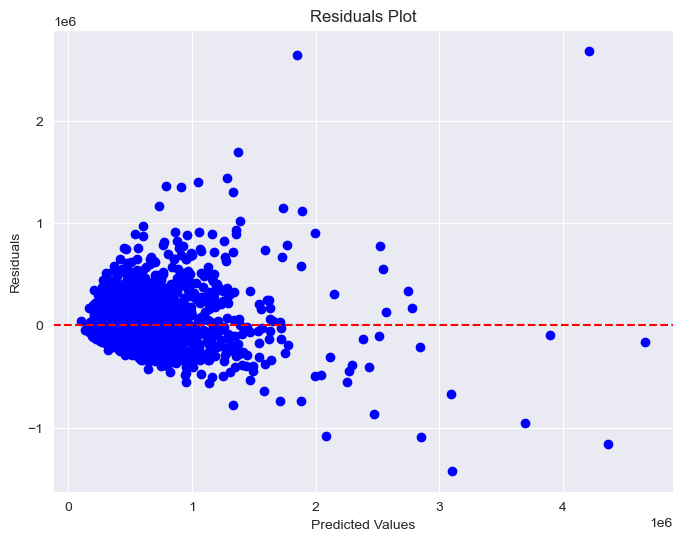

In [59]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test_original - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


# REGRESSION RESULTS

From all the models observed,We can see the positive correlation between the house prices and all other features except the year built which indicates a negative correlation.

Polynomial Regression is the preferred model beacuse from the evaluation it has the highest R-squared value of 0.73

The features below impact price such that an increase will cause an increase in the price of the property. 'bedrooms','bathrooms', 'sqft_living','floors', 'waterfront','view''condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15','renovated', 'basement'.

# Assumptions

Linearity: The relationship between the independent variables (predictors) and the dependent variable (response) is linear. This means that a change in the independent variable corresponds to a proportional change in the dependent variable.

Independence of errors: The errors (residuals) from the regression model should be independent of each other. In other words, the residual for one observation should not predict the residual for another observation.

Normality of errors: The errors are normally distributed. This implies that the residuals should follow a normal distribution with a mean of zero.

No perfect multicollinearity: There should be no perfect linear relationship between the independent variables. In other words, no independent variable should be a perfect linear combination of other independent variables.

# Limitations
Despite its effectiveness in predicting property prices, the model has several limitations that need to be addressed:

Limited Property Characteristics: The dataset may lack comprehensive property-based characteristics, potentially limiting the model's ability to capture the full range of factors influencing housing prices.


Multicollinearity Concerns: The presence of correlated predictors, such as square footage and number of bedrooms, can introduce multicollinearity issues. This makes it difficult to discern the individual impact of each feature accurately, potentially affecting the model's reliability.

Assumption Violations: Polynomial regression relies on the assumption of linearity between predictors and the target variable. However, in reality, this assumption may not always hold true, leading to biased estimates and less dependable predictions.Also heteroscedasticity was present.

Overfitting Risk: Polynomial regression models, especially those with high degrees, are prone to overfitting. This occurs when the model fits the training data too closely, capturing noise rather than underlying patterns. As a result, the model may struggle to generalize well to unseen data, impacting its predictive performance.

# Recommedations
# Statistical recommedations.
To mitigate multicollinearity, strategies such as feature selection, principal component analysis (PCA), or regularization methods like ridge regression or Lasso regression can be employed. These techniques prioritize essential predictors and enhance the model's interpretability while stabilizing it against multicollinearity.



Before opting for polynomial regression, it's essential to validate the assumption of linearity between predictors and the target variable. If this assumption doesn't hold, alternative regression techniques such as generalized additive models (GAMs) or spline regression should be considered to better capture intricate relationships.


Preventing heteroscedasticity, or addressing it if it's present, is crucial for ensuring the reliability of linear regression analysis
# Recommedation to real estate clients:Home owners and investors.


1.Invest in Larger Properties: Investors seeking maximum returns should focus on larger houses, as there's a positive correlation between total square footage and price. Such properties have the potential for higher profits upon resale or rental.


2.Upgrade Existing Properties: Homeowners can increase their property's value by investing in upgrades that increase square footage, such as adding extra rooms or expanding living spaces.


3.Optimize Bedroom and Bathroom Ratios: It's essential to find the right balance between bedrooms and bathrooms to maximize property value. Consulting with real estate professionals can help determine the optimal ratio based on market trends and buyer preferences.


4.Focus on Quality Over Quantity: Prioritize quality improvements that enhance functionality and aesthetics, such as renovating bathrooms with modern fixtures or upgrading kitchen appliances, to add perceived value to the property.


5.Highlight Features in Listings: Emphasize the number of bedrooms and bathrooms in property listings to attract buyers who prioritize space and convenience. Highlight unique features that add versatility to the property.


6.Differentiate Marketing Strategies: Tailor marketing strategies based on property condition and grade ratings. Highlight the benefits of higher-grade properties to attract premium buyers, while emphasizing renovation potential for properties with lower condition ratings.









# CONCLUSION

Property Size Matters: There is a clear positive correlation between the size of a property, indicated by total square footage, and its price. Investing in larger properties can potentially yield higher returns for investors and increase market value for homeowners.


Strategic Upgrades Add Value: Upgrading existing properties with strategic renovations and expansions, particularly those that increase square footage, can enhance their market value. Quality improvements that improve functionality and aesthetics are key to maximizing property value.


Balance is Key: While adding extra bedrooms and bathrooms can increase a property's price, there's a point of diminishing returns. It's important to strike a balance between quantity and quality, optimizing the bedroom-to-bathroom ratio to align with market trends and buyer preferences.


Marketing Differentiation is Essential: Tailoring marketing strategies based on property condition and grade ratings is crucial. Highlighting the unique features and benefits of higher-grade properties can attract premium buyers, while emphasizing renovation potential for properties with lower ratings can appeal to savvy investors.
